# Lab 4.02 - Bivariate Analysis of Qualitative Data

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 2 - NBA Salaries

The file NBA.csv contains annual salaries for all NBA basketball players in the season (2008–2009), check whether there is independence between position and salary. To do this, first change any hyphenated position such as C-F to 
the first listed, in this case C. (Presumably, this is 
the player's primary position.)     
Then remove $ and . in Annual Salary and make Annual Salary categorical with four categories: the first is all salaries below the first quartile, the second is all salaries from the first quartile to the median, and so on.  
First make a plot

Results of the main calculations:
  - χ² ≈ 3.0344 
  - p-value = 0.8045
  - We do not reject H0


  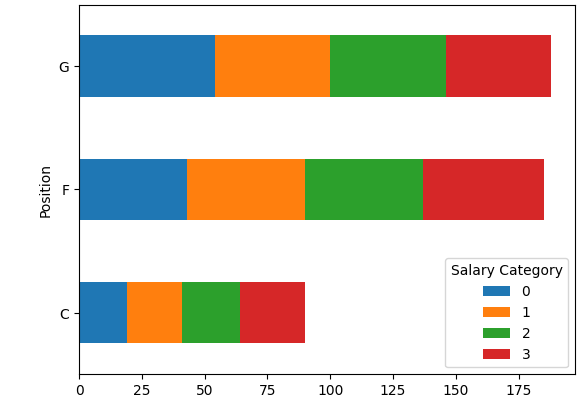

##  STAP 1 – Dataset inladen en inspecteren

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/NBA.csv', sep=";")
df.head(10)

,Player,Team,Position,Annual Salary,Contract Yrs,Contract Amt,Contract Thru
0,"Bibby, Mike",Atlanta Hawks,G,$14.983.603,1,$14.983.603,2008-09
1,"Johnson, Joe",Atlanta Hawks,G,$14.232.566,5,$70.000.000,2009-10
2,"Smith, Josh",Atlanta Hawks,F,$10.000.000,5,$58.000.000,2012-13
3,"Claxton, Speedy",Atlanta Hawks,G,$5.757.818,4,$25.000.000,2010-11
4,"Williams, Marvin",Atlanta Hawks,F,$5.636.142,4,$18.160.000,2008-09(t)
5,"Horford, Al",Atlanta Hawks,C-F,$4.023.720,3,$12.080.160,2009-10
6,"Pachulia, Zaza",Atlanta Hawks,C,$4.000.000,4,$16.000.000,2008-09
7,"Evans, Maurice",Atlanta Hawks,F-G,$2.500.000,3,$7.500.000,2010-11
8,"Law, Acie",Atlanta Hawks,G,$2.071.680,3,$6.214.920,2009-10
9,"Murray, Ronald",Atlanta Hawks,G,$1.500.000,1,$1.500.000,2008-09


## ✅ STAP 2 – Data voorbereiden

2.1 Neem alleen de eerste letter van de positie (primaire positie).

In [4]:
df["Position"] = df["Position"].str[0]

2.2 Salaris omzetten naar numeriek
-  Verwijder $ en . en zet om naar numeriek formaat.

In [6]:
df["Annual Salary"] = df["Annual Salary"].str.replace("$", "", regex=False).str.replace(".", "", regex=False)
df["Annual Salary"] = pd.to_numeric(df["Annual Salary"])

2.3 Maak salaris-categorieën (kwartielen)
-  Verdeel de salarissen in 4 kwartielen (label 0 = laagste groep).

In [7]:
df["Salary Category"] = pd.qcut(df["Annual Salary"], q=4, labels=[0, 1, 2, 3])

## ✅ STAP 3 – Maak een kruistabel

In [8]:
# Maak een kruistabel: hoeveel spelers per positie per salarisgroep?
observed = pd.crosstab(df["Position"], df["Salary Category"])
observed


Salary Category,0,1,2,3
Position,,,,
C,19,22,23,26
F,43,48,46,48
G,54,46,46,42


## ✅ STAP 4 – Visualisatie (gestapelde barplot)

<Axes: ylabel='Position'>

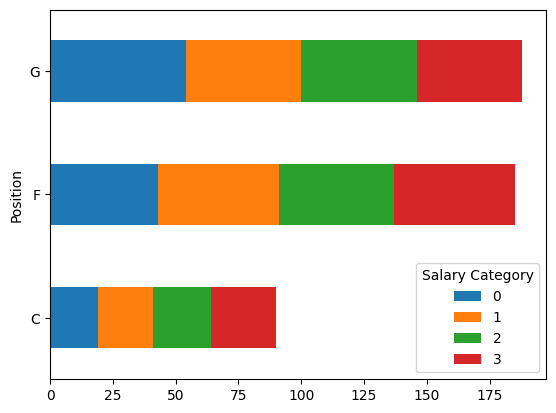

In [9]:
observed.plot(kind="barh", stacked=True)


## ✅ STAP 5 – Chi-squared test uitvoeren

In [10]:

chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared: %.4f" % chi2)
print("p-value    : %.4f" % p)
print("Degrees of freedom:", dof)

Chi-squared: 3.0774
p-value    : 0.7991
Degrees of freedom: 6


## ✅ STAP 6 – Kritieke waarde + beslissing

In [11]:
alpha = 0.05
critical = stats.chi2.isf(alpha, df=dof)

print("Critical value: %.4f" % critical)

if chi2 > critical:
    print("Besluit: Verwerp H0 (er is een verband)")
else:
    print("Besluit: Verwerp H0 niet (geen verband)")

Critical value: 12.5916
Besluit: Verwerp H0 niet (geen verband)
